In [1]:
import pandas as pd
import requests
from urllib.parse import urlencode
import json, datetime

api_key = "94bd224fdd23e740f91f7fc88375518f"

city = "Warsaw"

In [2]:
params = dict(
    q=city,
    appid=api_key
)

url = 'http://api.openweathermap.org/data/2.5/forecast?q={}&units=metric&APPID={}'.format(city, api_key)
r = requests.get(url)
weather = json.loads(r.text)
df = pd.DataFrame.from_dict(weather['list'])

In [3]:
from datetime import datetime

def _dict_to_val(_dict):
    try:
        return list(_dict.values())[0]
    except:
        return 0

df["clouds"] = df.apply(lambda x: x.clouds["all"], axis=1)
df["rain"] = df.apply(lambda x: _dict_to_val(x.rain), axis=1)
df["snow"] = df.apply(lambda x: _dict_to_val(x.snow), axis=1)
df["sys"] = df.apply(lambda x: list(x.sys["pod"]), axis=1)
df["dt_txt1"] = df.apply(lambda x: datetime.strptime(x.dt_txt, '%Y-%m-%d %H:%M:%S'), axis=1)
df["date"] = df.apply(lambda x: x.dt_txt1.date(), axis=1)
df["time"] = df.apply(lambda x: x.dt_txt1.time(), axis=1)

# datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')

df  = df.merge(df.wind.apply(lambda s: pd.Series({'wind_speed':s["speed"], 'wind_deg':s["deg"]})), 
    left_index=True, right_index=True)
df = df.merge(df.main.apply(lambda s: pd.Series({'temp':s["temp"], 'temp_min':s["temp_min"], 'temp_max':s["temp_max"], 'pressure': s['pressure'], "sea_level": s["sea_level"], "grnd_level": s["grnd_level"], "humidity": s["humidity"], "temp_kf": s["temp_kf"]})), 
    left_index=True, right_index=True)

df = df.drop(columns=["main", "wind", "weather", "dt_txt"])

In [4]:
df

,clouds,dt,rain,snow,sys,dt_txt1,date,time,wind_speed,wind_deg,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,temp_kf
0,76,1546786800,0.00,0.02200,[n],2019-01-06 15:00:00,2019-01-06,15:00:00,4.70,1.00244,-4.18,-5.21,-4.18,1025.56,1038.66,1025.56,91.0,1.03
1,36,1546797600,0.00,0.08900,[n],2019-01-06 18:00:00,2019-01-06,18:00:00,4.55,8.50360,-5.15,-5.92,-5.15,1027.54,1040.73,1027.54,92.0,0.77
2,12,1546808400,0.00,0.00900,[n],2019-01-06 21:00:00,2019-01-06,21:00:00,3.11,7.00113,-7.52,-8.04,-7.52,1028.89,1042.13,1028.89,89.0,0.51
3,12,1546819200,0.00,0.00000,[n],2019-01-07 00:00:00,2019-01-07,00:00:00,1.40,336.50000,-10.44,-10.70,-10.44,1029.61,1043.04,1029.61,79.0,0.26
4,68,1546830000,0.00,0.01625,[n],2019-01-07 03:00:00,2019-01-07,03:00:00,1.41,307.00200,-10.15,-10.15,-10.15,1030.54,1043.79,1030.54,70.0,0.00
5,68,1546840800,0.00,0.08375,[n],2019-01-07 06:00:00,2019-01-07,06:00:00,1.42,274.50300,-8.38,-8.38,-8.38,1030.98,1044.26,1030.98,86.0,0.00
6,56,1546851600,0.00,0.04250,[d],2019-01-07 09:00:00,2019-01-07,09:00:00,2.75,228.50600,-7.82,-7.82,-7.82,1030.95,1044.30,1030.95,92.0,0.00
7,24,1546862400,0.00,0.01750,[d],2019-01-07 12:00:00,2019-01-07,12:00:00,3.70,233.00100,-6.48,-6.48,-6.48,1029.81,1042.96,1029.81,92.0,0.00
8,24,1546873200,0.00,0.00000,[n],2019-01-07 15:00:00,2019-01-07,15:00:00,3.41,212.50000,-7.41,-7.41,-7.41,1028.15,1041.44,1028.15,85.0,0.00
9,32,1546884000,0.00,0.00000,[n],2019-01-07 18:00:00,2019-01-07,18:00:00,4.26,209.50200,-8.56,-8.56,-8.56,1026.21,1039.41,1026.21,82.0,0.00


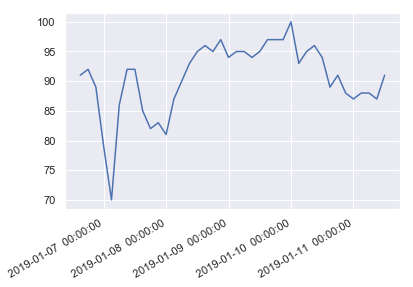

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
sns.set()
%matplotlib inline

fig, ax = plt.subplots()
plt.plot(df["dt_txt1"], df["humidity"])

ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d  %H:%M:%S'))
fig.autofmt_xdate()
plt.show()

In [6]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib.dates as mdates
# sns.set()
# %matplotlib inline

# def plot_humidity_by_date(date):
#     fig, ax = plt.subplots()
#     df2 = df.loc[df["date"] == datetime.strptime(date, "%Y-%m-%d").date()]
#     plt.plot(df2["time"], df2["humidity"])
# #     plt.bar(df2["time"], df[""])
#     fig.autofmt_xdate()
#     plt.show()

In [7]:
# plot_humidity_by_date("2019-01-08")

In [8]:
import time
from datetime import datetime
import numpy as np
from matplotlib.ticker import FuncFormatter, MaxNLocator

def format_fn(tick_val, tick_pos):
    if int(tick_val) in list(t_dict.keys()):
        print(t_dict[int(tick_val)])
        return t_dict[int(tick_val)]
    else:
        return ''
    
def plot_humidity_by_date(date):
    width = 0.5
    t_dict = {}
    tList = []
    fig, ax = plt.subplots()
    t = 0
    df2 = df.loc[df["date"] == datetime.strptime(date, "%Y-%m-%d").date()]
    date_time_list = df2["dt_txt1"].tolist()
    while t < len(date_time_list):
        ti = int(time.mktime(date_time_list[t].timetuple()))
        t_dict[ti] = date_time_list[t]
        tList.append(ti)
        t = t + 1

    plt.plot(tList, df2["humidity"],'ro')

    z = np.polyfit(tList, df2["humidity"], 25)
    f = np.poly1d(z)
    x_new = np.linspace(tList[0], tList[-1], 50)
    y_new = f(x_new)
    plt.plot(x_new, y_new, color="blue")

    plt.ylabel('Humidity')
    plt.xlabel('Date/Time')

    ax.xaxis.set_major_formatter(FuncFormatter(format_fn))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.autoscale(tight=True)

    plt.show()

/home/rozanovk/PycharmProjects/weather_forecast/venv3.6/lib/python3.6/site-packages/ipykernel_launcher.py:32: RankWarning: Polyfit may be poorly conditioned


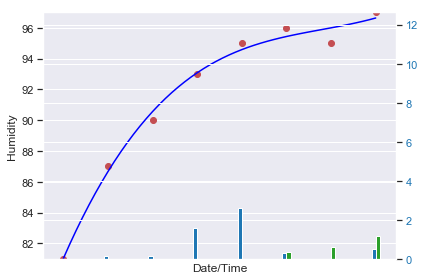

In [22]:
import time
from datetime import datetime
import numpy as np
from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.style as style 

# style.use('seaborn-poster') #sets the size of the charts
# style.use('ggplot')

def format_fn(tick_val, tick_pos):
    if int(tick_val) in list(t_dict.keys()):
        print(t_dict[int(tick_val)])
        return t_dict[int(tick_val)]
    else:
        return ''
    
width = 0.5
t_dict = {}
tList = []
fig, ax1 = plt.subplots()
t = 0
df2 = df.loc[df["date"] == datetime.strptime("2019-01-08", "%Y-%m-%d").date()]
date_time_list = df2["dt_txt1"].tolist()
while t < len(date_time_list):
    ti = int(time.mktime(date_time_list[t].timetuple()))
    t_dict[ti] = date_time_list[t]
    tList.append(ti)
    t = t + 1

ax1.plot(tList, df2["humidity"],'ro')

z = np.polyfit(tList, df2["humidity"], 25)
f = np.poly1d(z)
x_new = np.linspace(tList[0], tList[-1], 50)
y_new = f(x_new)
ax1.plot(x_new, y_new, color="blue")

ax1.set_ylabel('Humidity')
ax1.set_xlabel('Date/Time')

ax1.set_xticks(date_time_list)
# ax1.xaxis.set_major_formatter(FuncFormatter(format_fn))
# ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.autoscale(tight=True)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.bar([t -500 for t in tList], df2["snow"], color=color, width=1000)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([df2["snow"].min() ,df2["snow"].max() + 10])


color = 'tab:green'
ax2.bar([t +500 for t in tList], df2["rain"], color=color, width=1000)
fig.tight_layout()

plt.show()

/home/rozanovk/PycharmProjects/weather_forecast/venv3.6/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


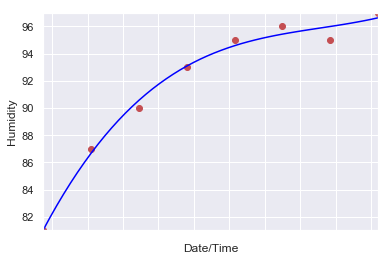

In [10]:
plot_humidity_by_date("2019-01-08")

**Plot pressure**

/home/rozanovk/PycharmProjects/weather_forecast/venv3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0, 0.5, 'Pressure [mmHg]')

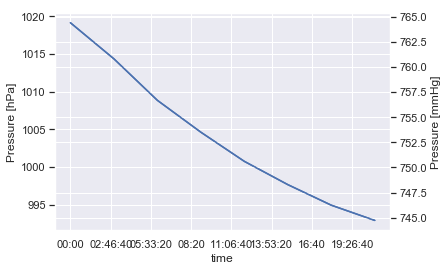

In [11]:
fig, ax1 = plt.subplots()

df2 = df.loc[df["date"] == datetime.strptime("2019-01-08", "%Y-%m-%d").date()]
df2["pressure_mmHg"] = df2.apply(lambda x: x.pressure*0.7500616827, axis=1)

ax1.set_xlabel('time')
ax1.set_ylabel('Pressure [hPa]')
ax1.plot(df2["time"], df2["pressure"])
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

ax2.plot(df2["time"], df2["pressure_mmHg"])
ax2.set_ylabel('Pressure [mmHg]')
# plt.ylabel('Pressure [hPa]')
# plt.plot(df2["time"], df2["pressure"])